# Visualisation des données sur les incidents de sécurité sur le réseau de la SCNF

In [211]:
############ Importation des modules nécessaires et du jeu de données ##############
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime  #pour la gestion des dates
url_api="https://ressources.data.sncf.com/api/v2/catalog/datasets/incidents-securite/exports/json?limit=-1&offset=0&lang=fr&timezone=Europe%2FParis"
incident= pd.read_json(url_api)
#incident.head()

In [212]:
######## Retrait des données de 2015 ###########
incident['annee']=incident['date'].dt.strftime('%Y')
incident2=incident.drop(incident[incident['annee']=="2015"].index, inplace=False)

## En moyenne, sur la période de 2016 à 2022, quelles sont les régions dans lesquelles les incidents sont les plus graves? 💡

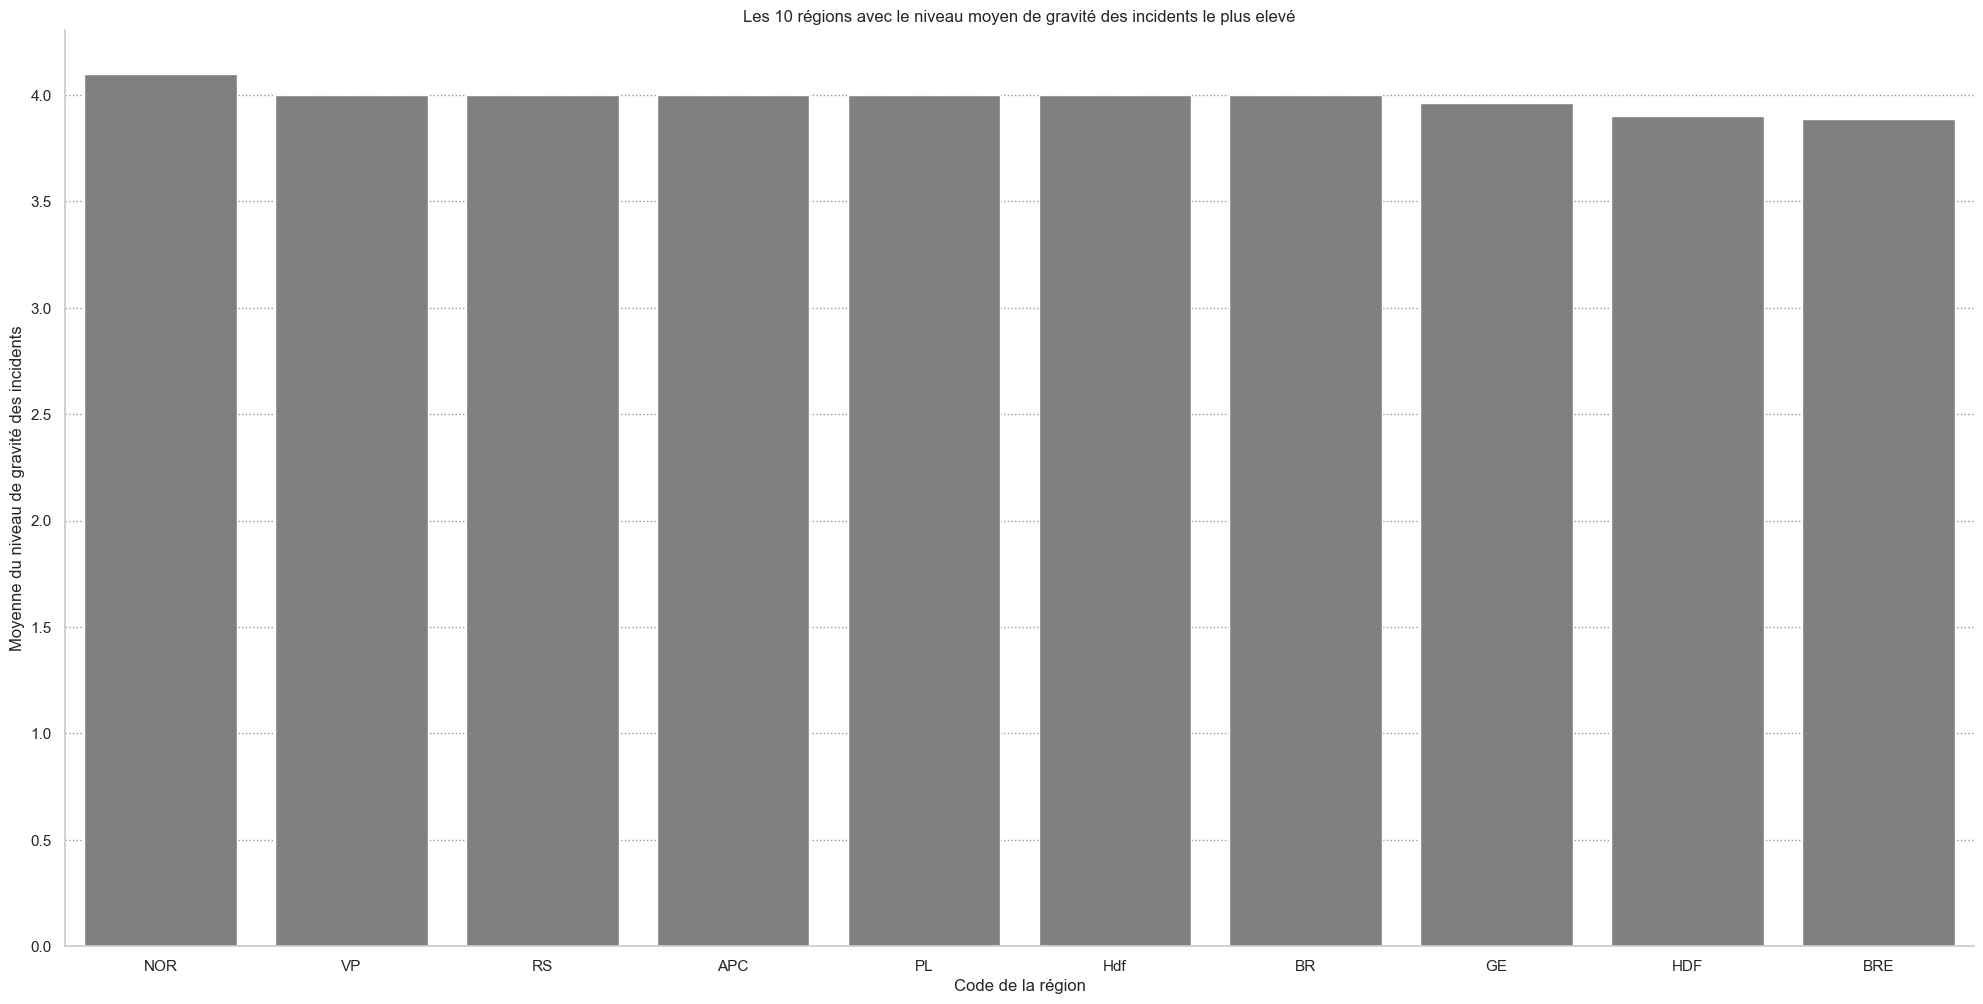

In [213]:
df1=incident2.groupby('region').agg({'niveau_gravite': "mean"}).sort_values('niveau_gravite', ascending = False).head(10)
df1=df1.reset_index()
#sns.set(style="darkgrid")
g = sns.catplot(x='region', y='niveau_gravite', data=df1, kind = "bar", height = 10, aspect = 2, color='gray')
g.set_axis_labels('Code de la région', 'Moyenne du niveau de gravité des incidents')
plt.title('Les 10 régions avec le niveau moyen de gravité des incidents le plus elevé')
plt.show()

## Comment sont répartis les incidents survenus par année?

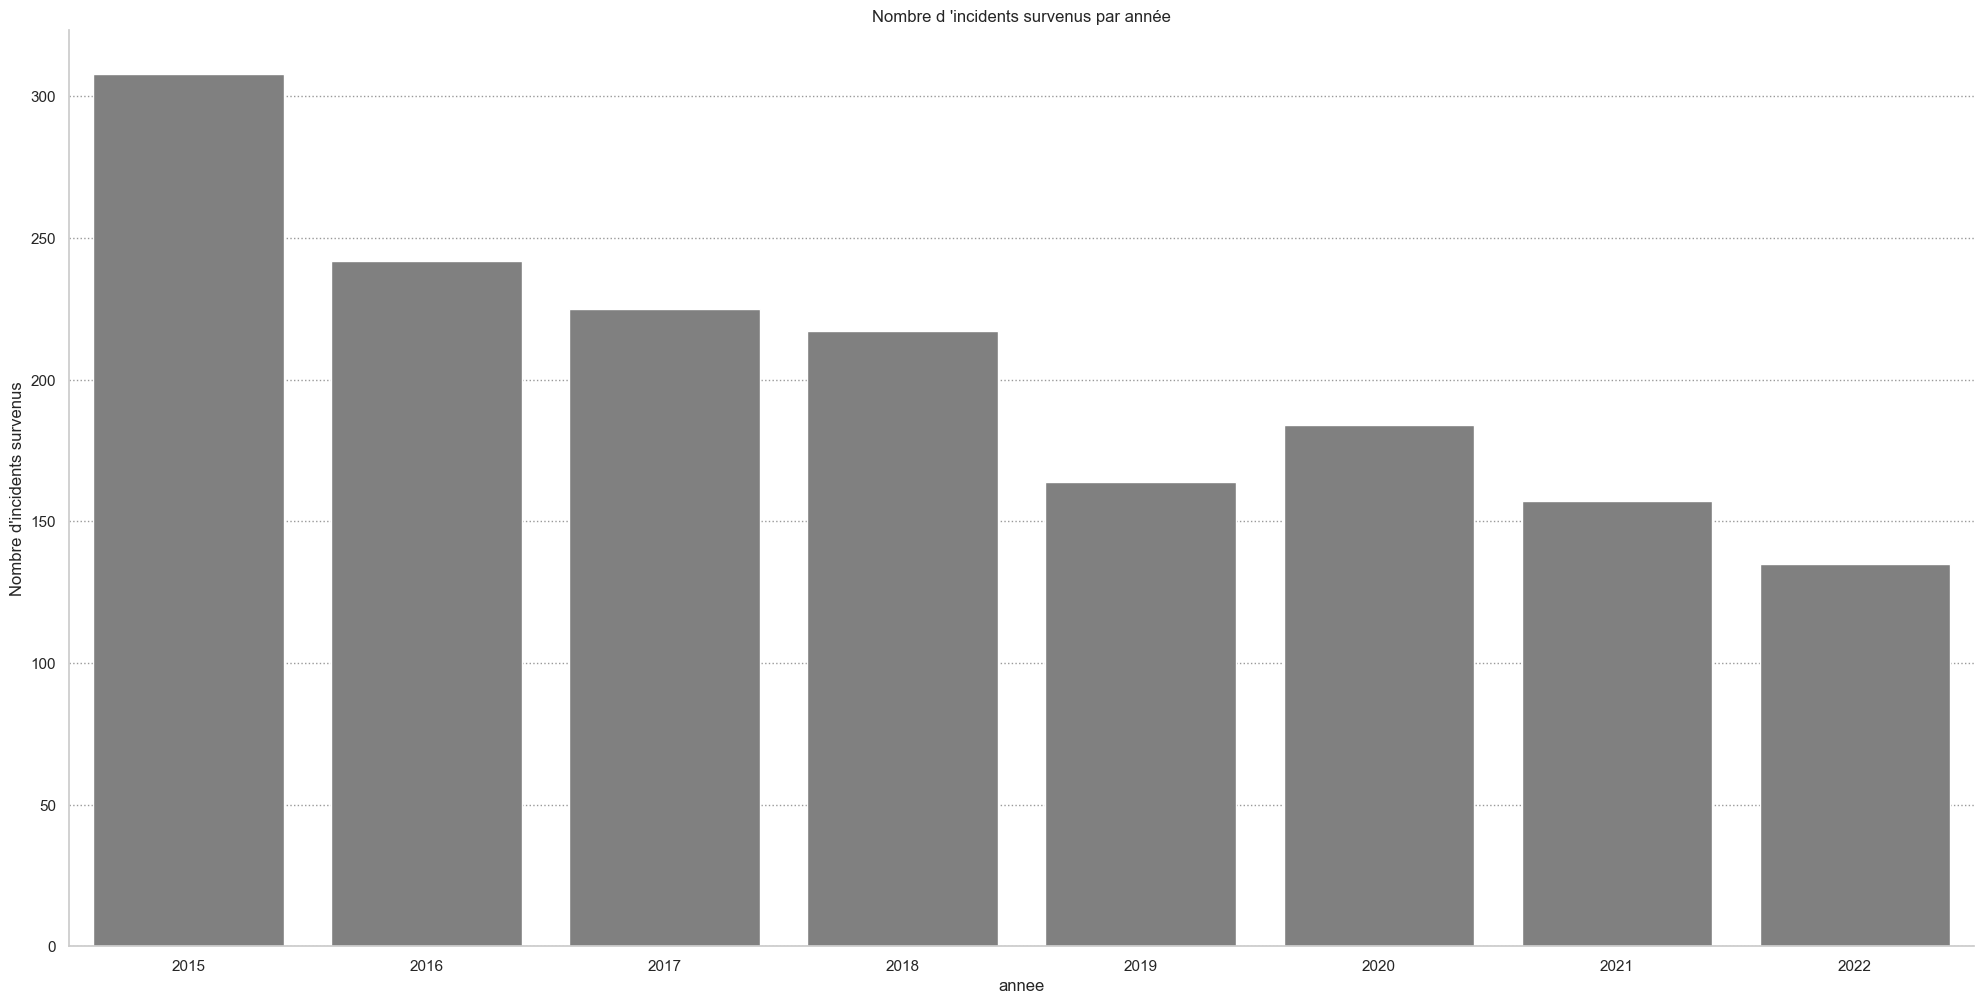

In [214]:
df2=incident.groupby('annee').agg({'annee': "count"})
df2.rename(columns = {'annee':'occurence'}, inplace = True)
df2=df2.reset_index()
g1 = sns.catplot(x='annee', y='occurence', data=df2, kind = "bar", height = 10, aspect = 2, color='gray')
g1.set_axis_labels('annee', 'Nombre d\'incidents survenus')
plt.title('Nombre d \'incidents survenus par année')
plt.show()

## Evolution du niveau moyen de gravité des incidents survenus depuis 2016

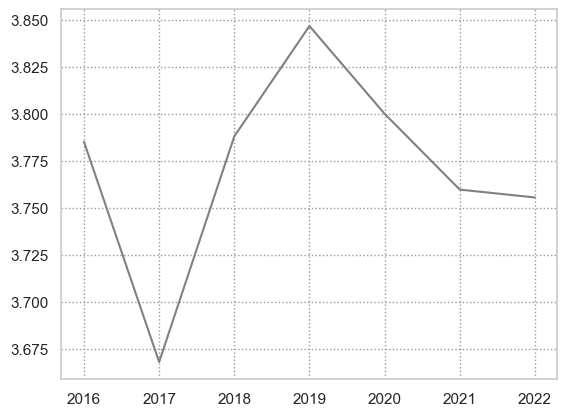

In [215]:
df3=incident2.groupby('annee').agg({'niveau_gravite': "mean"})
df3=df3.reset_index()
sns.set_style("whitegrid",{"grid.color": ".6", "grid.linestyle": ":"})
plt.plot(df3['annee'], df3['niveau_gravite'], "gray")